# 시계열 예측

## 설치 모듈
- pip install prophet (fbprophet -> prophet 모듈명 변경됨)
- pip install statsmodels

## Prophet 모듈
- 페이스북에서 공개한 시계열 예측 학습기
- 참고 문서 :
    - https://hyperconnect.github.io/2020/03/09/prophet-package.html

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시계열 예측 모델 클래스
from prophet import Prophet

In [3]:
data_path = 'ml_datas/cabbage/2022_배추가격.csv'

In [4]:
data_df = pd.read_csv(data_path, encoding='utf-8')
data_df.head()

,날짜,배추가격
0,2022-01-03,4151
1,2022-01-04,4289
2,2022-01-05,4302
3,2022-01-06,4387
4,2022-01-07,4387


In [20]:
data_set = data_df.copy()
data_set.columns=["ds", "y"]
data_set

,ds,y
0,2022-01-03,4151
1,2022-01-04,4289
2,2022-01-05,4302
3,2022-01-06,4387
4,2022-01-07,4387
...,...,...
241,2022-12-26,2955
242,2022-12-27,2955
243,2022-12-28,2972
244,2022-12-29,3000


In [15]:
data_set = data_df.rename(columns= {"날짜" : "ds", "배추가격" : "y"})

In [16]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      246 non-null    object
 1   y       246 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


### 중요
ds column type은 datetime 을 사용해야함

In [17]:
data_set["ds"] = pd.to_datetime(data_set.ds).dt.tz_localize(None)

In [18]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      246 non-null    datetime64[ns]
 1   y       246 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.0 KB


In [ ]:
# data_set['y'] = data_set['y'].astype(dtype='float')

## 자기상관 기반 배추가격 추세 확인
- x축은 lag의 개수이며 y축은 lag의 개수에 따른 데이터와 상관계수
- plot_pacf : partial auto-correlative function부분 자기상관 함수
    - 정상적인 데이터의 경우 빠르게 0에 수렴함
    - 첫번째 막대는 자기자신의 상관관계 이므로 항상 1
    - 참고 - https://han.gl/NjgNDN
- plot_acf :auto-correlative function; 자기상관 함수
- 파란 음영은 alpha=0.05일때, 95% 신뢰구간으로 추정된 표준편차를 의미함
- 파란 점 : leg별 자기 상관계수를 의미함
- leg는 실제값과 추정값의 - 참고 - https://signature95.tistory.com/24

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

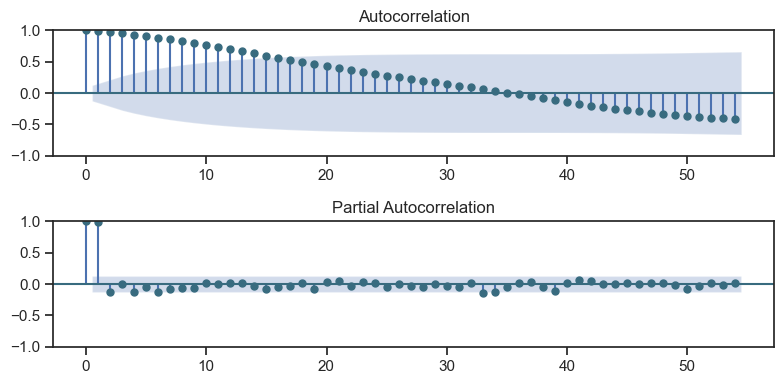

In [23]:
plt.figure(figsize=(8,4))
sns.set(style="ticks")
c = "#386B7F"
plt.subplot(211); plot_acf(data_set["y"], ax=plt.gca(), lags=54, color=c)
plt.subplot(212); plot_pacf(data_set["y"], ax=plt.gca(), lags=54, color=c)

plt.tight_layout()
plt.show()

## 모델 학습

In [24]:
# Prophet(x) : x? Interval width : 95% (기본값 : 80%)
model_ph = Prophet()

In [25]:
model_ph.fit(data_set)

15:46:38 - cmdstanpy - INFO - Chain [1] start processing
15:46:38 - cmdstanpy - INFO - Chain [1] done processing


## 미래 시간 만들기

In [30]:
# 6주 간의 미래 데이터 만듬(6*7 = 42일) 간의 미래 데이터 예측
future_dates = model_ph.make_future_dataframe(periods=6*7) # 학습 시킨 모델 이름으로 메모리의 올라감

print("첫번째 주 예측 : ")
future_dates.tail(42)

첫번째 주 예측 : 


,ds
246,2022-12-31
247,2023-01-01
248,2023-01-02
249,2023-01-03
250,2023-01-04
251,2023-01-05
252,2023-01-06
253,2023-01-07
254,2023-01-08
255,2023-01-09


## 미래 데이터 예측

In [33]:
# 미래 데이트 값 넣기
forecast = model_ph.predict(future_dates)

print(forecast)
print(type(forecast))

            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2022-01-03  4116.374115  2978.832140  5057.810990  4116.374115   
1   2022-01-04  4120.426858  3105.638581  5228.051760  4120.426858   
2   2022-01-05  4124.479601  3099.376109  5261.965330  4124.479601   
3   2022-01-06  4128.532344  3042.012506  5120.239751  4128.532344   
4   2022-01-07  4132.585087  3057.634318  5112.005426  4132.585087   
..         ...          ...          ...          ...          ...   
283 2023-02-06  -603.369005 -1733.323178   488.800369  -851.070835   
284 2023-02-07  -664.027621 -1729.973957   515.522853  -922.577793   
285 2023-02-08  -724.686237 -1753.519380   376.271891  -992.618456   
286 2023-02-09  -785.344852 -1864.834753   398.270648 -1066.860639   
287 2023-02-10  -846.003468 -2011.413881   209.765181 -1137.217517   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    4116.374115      -62.260578            -62.260578            -62.260578   

In [34]:
# 마지막 주 예측
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
281,2023-02-04,-474.673599,-1470.108474,610.631672
282,2023-02-05,-535.332274,-1656.050438,611.413732
283,2023-02-06,-665.629583,-1733.323178,488.800369
284,2023-02-07,-608.166617,-1729.973957,515.522853
285,2023-02-08,-682.335572,-1753.519380,376.271891
286,2023-02-09,-792.860234,-1864.834753,398.270648
287,2023-02-10,-889.195468,-2011.413881,209.765181


## 배추가격 예측(추정) 시각화

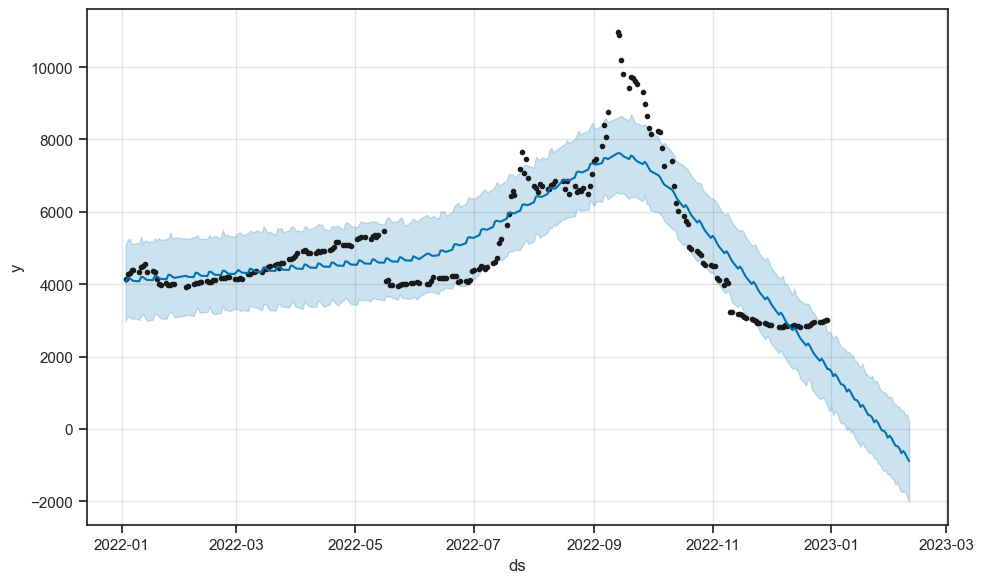

In [36]:
# 파란색 선이 예측값, 검은색 점이 실제 데이터임
model_ph.plot(forecast)

plt.tight_layout()
plt.show()